In [64]:
import numpy as np
import pandas as pd
from tensorflow import keras
from matplotlib import pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split

# to label and normalize data
from sklearn.preprocessing import StandardScaler

# additional models to compare against
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# 1. Load Dataset

In [48]:
df = pd.read_csv('framingham.csv')
pd.set_option('display.max.rows', 40)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Explore Data

In [49]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [50]:
df.isna().sum()
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

<Axes: >

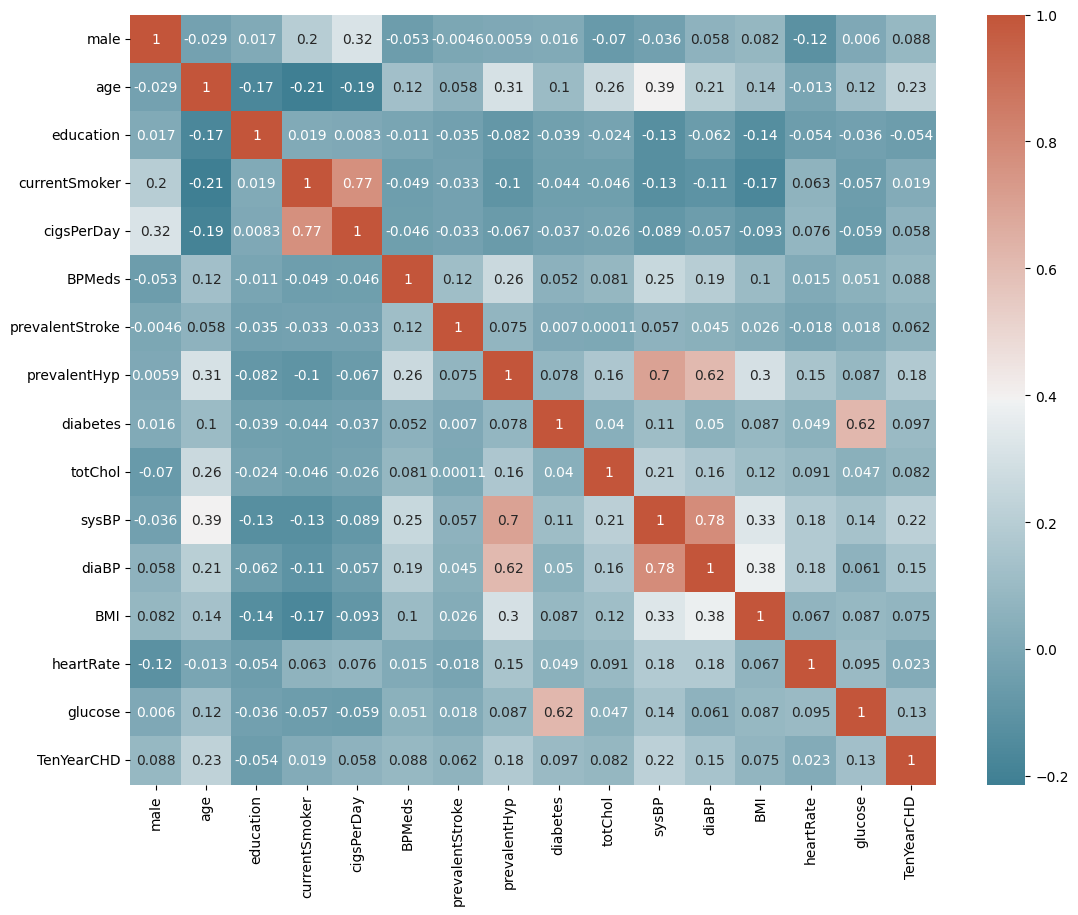

In [51]:
# correlation matrix of ALL variables 
correlation = df.corr()
plt.subplots(figsize=(13,10))
heatmap(correlation, 
        xticklabels=correlation.columns, 
        yticklabels=correlation.columns, 
        annot=True, 
        cmap=sb.diverging_palette(220, 20, as_cmap=True))


# 2. Data Processing

Normalize values

In [52]:
scaler = StandardScaler()
# cols to normalize
scale_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
# normlize columns
df[scale_cols] = StandardScaler.fit_transform(scaler, df[scale_cols])

Encode ordinal data

In [54]:
# convert education levels into indicators variable
df = pd.get_dummies(df, columns=['education'])

KeyError: "None of [Index(['education'], dtype='object')] are in the [columns]"

In [57]:
df['education_1.0'] = df['education_1.0'].astype(int)
df['education_2.0'] = df['education_2.0'].astype(int)
df['education_3.0'] = df['education_3.0'].astype(int)
df['education_4.0'] = df['education_4.0'].astype(int)
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
0,1,-1.234283,0,-0.755465,0.0,0,0,0,-0.935261,-1.196267,-1.083027,0.286614,0.342735,-0.207240,0,0,0,0,1
1,0,-0.417664,0,-0.755465,0.0,0,0,0,0.298311,-0.515399,-0.159355,0.718054,1.590247,-0.248992,0,0,1,0,0
2,1,-0.184345,1,0.922240,0.0,0,0,0,0.186168,-0.220356,-0.243325,-0.112959,-0.073103,-0.499501,0,1,0,0,0
3,0,1.332233,1,1.761092,0.0,0,1,0,-0.262404,0.800946,1.016227,0.681284,-0.904778,0.878299,1,0,0,1,0
4,0,-0.417664,1,1.173896,0.0,0,0,0,1.083311,-0.106878,0.092555,-0.662065,0.758572,0.126772,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,-0.184345,1,0.922240,NaN,0,0,0,0.253454,-0.061487,-0.915087,-0.931716,0.675405,0.168524,0,0,1,0,0
4236,0,-0.650984,1,0.502814,0.0,0,0,0,-0.598832,-0.265747,0.344466,-1.627904,0.841740,NaN,0,1,0,0,0
4237,0,0.282295,0,-0.755465,0.0,0,0,0,0.724454,0.051991,0.008585,-1.061638,0.342735,1.045305,0,0,1,0,0
4238,1,-1.117623,0,-0.755465,0.0,0,1,0,-1.159547,0.392425,1.268138,-0.049224,-0.738443,-0.415998,0,0,0,1,0


Remove missing values

In [65]:
df.isna().sum()
df.dropna(how='any', inplace=True)
df.shape

(3751, 19)

# 3. Split Train and Test Data

In [77]:
# target = ten year risk of CHD
y = df['TenYearCHD']
# drop y from dataset
X = df.drop(['TenYearCHD'], axis=1)

# create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0
2326,1,-0.417664,1,0.922240,0.0,0,0,0,0.500168,-1.423223,-0.999057,-1.397475,0.342735,-0.374246,0,0,0,1
721,1,1.098914,1,4.277650,0.0,0,1,0,1.374883,0.959815,1.855929,-0.184049,-0.488940,0.085020,1,0,0,0
386,0,1.565553,0,-0.755465,0.0,0,1,0,-0.307261,2.071900,0.470421,0.338092,0.758572,0.377281,0,1,0,0
447,1,-0.417664,1,3.019371,0.0,0,0,0,-0.621261,-0.901224,-1.502878,0.411633,-0.073103,-0.165489,0,0,0,1
1473,1,-1.000963,0,-0.755465,0.0,0,1,0,-0.688547,-0.379225,0.596376,1.198522,-0.073103,0.043269,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,0,-1.117623,1,2.851601,0.0,0,1,0,-0.239975,0.256252,1.352108,2.259964,1.590247,-0.374246,1,0,0,0
1013,1,0.398955,0,-0.755465,0.0,0,0,0,-0.531547,-1.468614,-0.999057,-0.478213,0.093232,-0.290743,0,1,0,0
1229,0,-0.884303,1,0.502814,0.0,0,0,0,-0.890404,-0.379225,-0.159355,-1.054284,0.342735,-0.791761,0,1,0,0
258,0,-0.884303,0,-0.755465,0.0,0,0,0,-1.608119,-1.105485,-0.873102,-0.233076,0.509070,0.210275,1,0,0,0


# 4. Build ANN Model

In [70]:
from keras import layers
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam

In [79]:
# initialize model
model = keras.Sequential()

# add layers (dense, dropout, and FC)
model.add(layers.Dense(units=32, activation='relu', name='dense1'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=32, activation='relu', name='dense2'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=40, activation='relu', name='dense3'))
model.add(layers.Dense(units=12, activation='relu', name='dense4'))
model.add(layers.Dense(units=2, activation='softmax', name='FC1'))

Compile model

In [83]:
LEARN_RATE = 0.001
BATCH_SIZE = 25
EPOCHS = 100

opt = Adam(LEARN_RATE)
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 5. Train and Evaluate

In [84]:
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1)

Epoch 1/100
120/120 [==============================] - 2s 4ms/step - loss: 0.4765 - accuracy: 0.8487
Epoch 2/100
120/120 [==============================] - 1s 6ms/step - loss: 0.4197 - accuracy: 0.8527
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4027 - accuracy: 0.8527
Epoch 4/100
120/120 [==============================] - 0s 4ms/step - loss: 0.3916 - accuracy: 0.8527
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.8530
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3836 - accuracy: 0.8543
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8537
Epoch 8/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3822 - accuracy: 0.8503
Epoch 9/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3832 - accuracy: 0.8543
Epoch 10/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3774 - accura

In [85]:
model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)

31/31 [==============================] - 1s 7ms/step - loss: 0.4490 - accuracy: 0.8136


[0.4490239918231964, 0.8135818839073181]

In [86]:
model.save('disease_model_weights')

INFO:tensorflow:Assets written to: disease_model_weights/assets
